In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats

Number of samples in simulation

In [2]:
SAMPLE_SIZE = 100000

Some functions to simplify notation later

In [3]:
def get_normal_params(lower_limit, upper_limit, confidence):
    mean = 0.5 * (lower_limit + upper_limit)
    alpha = 1 - (1 - confidence) * 0.5
    sig = (upper_limit - mean) / scipy.stats.norm.ppf(alpha)
    return mean, sig

In [4]:
def get_lognormal_params(lower_limit, upper_limit, confidence):
    lower_normal = np.log(lower_limit)
    upper_normal = np.log(upper_limit)
    return get_normal_params(lower_normal, upper_normal, confidence)

In [5]:
def get_normal_sample(lower_limit, upper_limit, confidence=0.90):
    """
    Returns a normal sample with 90% (or custom) confidence 
    in the interval given by [lower_limit, upper_limit]
    """
    mean, sig = get_normal_params(lower_limit, upper_limit, confidence)
    return np.random.normal(mean, sig, size=SAMPLE_SIZE)

In [6]:
def get_lognormal_sample(lower_limit, upper_limit, confidence=0.90):
    """
    Returns a lognormal sample with 90% (or custom) confidence 
    in the interval given by [lower_limit, upper_limit]
    """
    mean, sig = get_lognormal_params(lower_limit, upper_limit, confidence)
    return np.random.lognormal(mean, sig, size=SAMPLE_SIZE)

# Parameters

Probability of $10\%$ agricultural shortfall each year

In [7]:
shortfall_prob = get_lognormal_sample(0.001, 0.1)
# make sure it's a reasonable probability:
shortfall_prob = np.minimum(shortfall_prob, 0.5)

Number of lives lost (millions) due to $10\%$ shortfall.
Note: It would make more sense to use a different distribution (e.g. gamma), 
we work with normal for simplicity

In [8]:
lives_lost = np.random.normal(400, 200, size=SAMPLE_SIZE)

Probability of $10\%$ agricultural shortfall in the next how many years

In [9]:
years = 50

Cost of 1 researcher per year (dollars)

In [10]:
cost_per_researcher = 100000

Number of people currently working on problem

In [11]:
num_people_working = get_lognormal_sample(10, 200)
# we know at least 1 people work at ALLFED
num_people_working = np.maximum(1, num_people_working)

Current probability of averting catastrophy

In [12]:
current_probability = get_lognormal_sample(0.001, 0.01)

Reduction in probability of not saving all the people from starvation given a year of work of an additional researcher.
(pretty ad hoc)

In [13]:
probability_reduction =  (1 - 0.1 / (num_people_working + 1))

# Some graphs

In [14]:
shortfall_prob_longterm = 1 - np.power(1 - shortfall_prob, years)

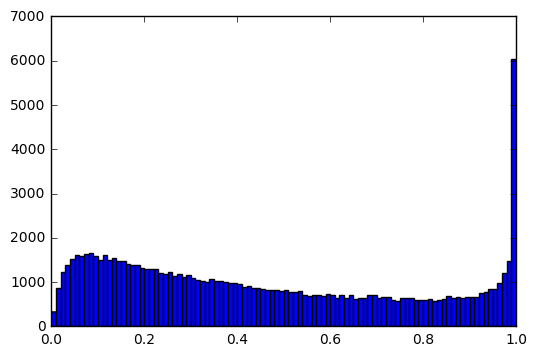

In [15]:
plt.hist(shortfall_prob_longterm, bins=100)
plt.show()

# Computation

In [16]:
expected_lives_lost = np.mean(shortfall_prob_longterm * lives_lost)
print("Total expected lives lost: %.1f" % expected_lives_lost)
lives_saved_current = shortfall_prob_longterm * lives_lost * current_probability
print("Expected lives saved with current preparation: %.3f" % np.mean(lives_saved_current))

Total expected lives lost: 182.9
Expected lives saved with current preparation: 0.739


Probability of saving everyone with additional researcher

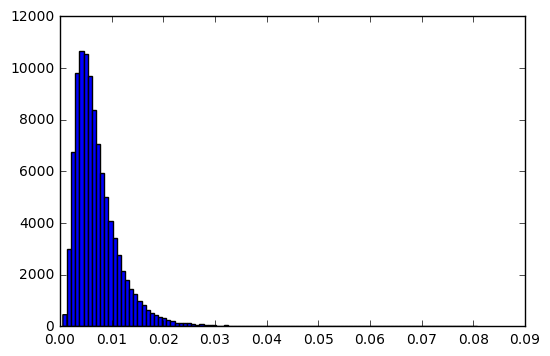

Mean probability after new researcher: 0.0072


In [17]:
new_probability = 1 - (1 - current_probability) * probability_reduction
plt.hist(new_probability, bins=100)
plt.show()
print("Mean probability after new researcher: %.4f" % np.mean(new_probability))

In [18]:
lives_saved_new = shortfall_prob_longterm * lives_lost * new_probability
print("Expected lives saved with additional researcher: %.3f" % np.mean(lives_saved_new))

Expected lives saved with additional researcher: 1.317


# Expected cost per life saved

In [19]:
cost_per_lives_saved = (lives_saved_new - lives_saved_current) * 10e6 / cost_per_researcher
print("Expected cost per life saved: $%.0f" % np.mean(cost_per_lives_saved))

Expected cost per life saved: $58


This measure is not necessarily the most meaningful, but a good reality check to be compared with the $\$0.20-\$400$ interval given in [ALLFED's article](http://effective-altruism.com/ea/1hq/how_you_can_save_expected_lives_for_020400_each/).